In [4]:
setwd("~/Documents/R scripts and data/PLAY")#set directory

data.ptime<-read.csv("playdatabytype.csv",header=T)
head(data.ptime)

,ID,SEX,SITE,Subsp,HABITAT,AREA,DENS,GR,FEM,MAL,⋯,PLAYSEC,OBSSEC,IM.RATIO,NOPLAYSECS,ad_ad_play,ad_im_play,mix_play,non_ad_ad_play,non_ad_im_play,non_mix_play
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,⋯,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,amp,f,AGA,mexicana,SEMIDEC,8.3,9.5,24,14,5,⋯,2043,118800,0.2105263,116757,1383,240,420,117417,118560,118380
2,amr,f,AGA,mexicana,SEMIDEC,8.3,9.5,24,12,6,⋯,12705,496800,0.2777778,484095,1310,9775,1620,495490,487025,495180
3,azt,f,AGA,mexicana,SEMIDEC,8.3,9.5,24,12,6,⋯,3990,331200,0.2777778,327210,2390,1250,350,328810,329950,330850
4,cha,f,AGA,mexicana,SEMIDEC,8.3,9.5,24,13,7,⋯,1770,136800,0.2500000,135030,1480,40,250,135320,136760,136550
5,chu,m,AGA,mexicana,SEMIDEC,8.3,9.5,20,12,5,⋯,725,176040,0.2941176,175315,335,390,0,175705,175650,176040
6,cri,m,AGA,mexicana,SEMIDEC,8.3,9.5,24,12,8,⋯,360,75600,0.2500000,75240,360,0,0,75240,75600,75600


AGA         CH         CP        LIZ        PLA         SE         SN 
0.23170557 0.17349943 0.05471414 0.02694444 0.40865741 0.00000000 0.21568510

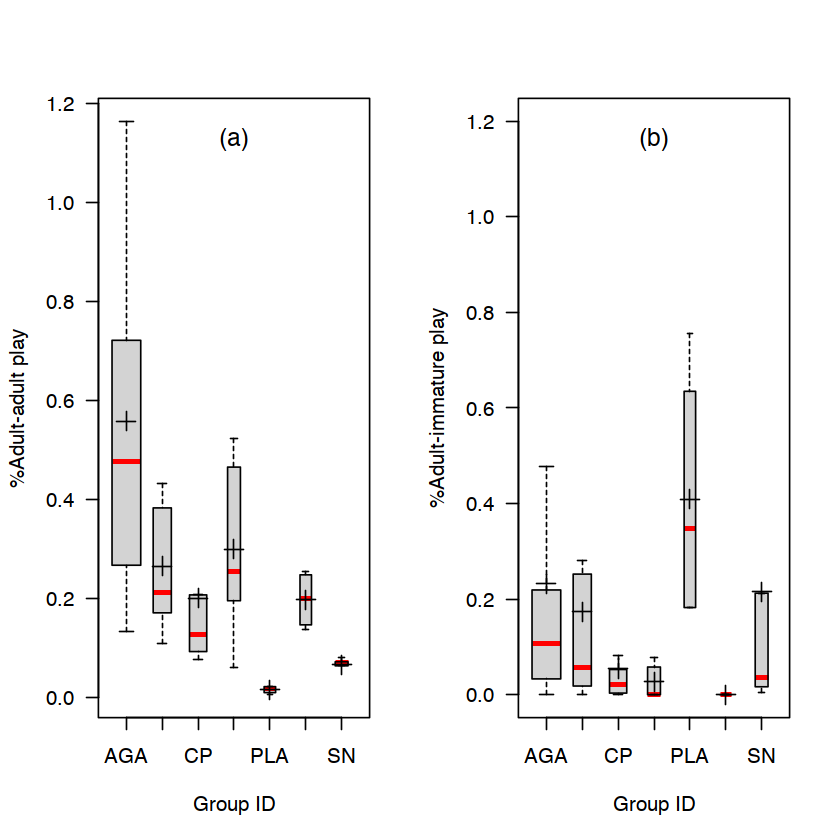

In [5]:
####FIGURE 3
########

par(mfrow=c(1,2))
data.ptime$X.ad<-(data.ptime$ad_ad_play/data.ptime$OBSSEC)*100
boxplot(X.ad~ SITE, data = data.ptime,las=1,
        xlab = "Group ID", ylab = "%Adult-adult play",
        varwidth = TRUE,
        col = "lightgray",outline=F,medcol="red")
title("(a)", adj = 0.5, line = -2)
means1 <- tapply(data.ptime$X.ad,data.ptime$SITE,mean)
points(means1,pch=3,
       cex=1.5)


####ad.im %play
####
data.ptime$X.im<-(data.ptime$ad_im_play/data.ptime$OBSSEC)*100
boxplot(X.im~ SITE, data = data.ptime,las=1,
        xlab = "Group ID", ylab = "%Adult-immature play",
        varwidth = TRUE,
        col = "lightgray",outline=F,medcol="red",
        ylim=c(0,1.2))
title("(b)", adj = 0.5, line = -2)
means2 <- tapply(data.ptime$X.im,data.ptime$SITE,mean)
means2
points(means2,pch=3,
       cex=1.5)

,ID,CLASS,GROUP,OBSTIMESECS,TOTAL_PLAY,MONTHS,PLAY.P
,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>
1,rme,I,AGA,510000,8655,4,1.6970588
2,vrd,I,AGA,66000,420,4,0.6363636
3,rds,J,AGA,612000,14247,7,2.3279412
4,rxy,I,AGA,90667,4590,7,5.0624814
5,sbt,I,AGA,184696,6515,7,3.5274180
6,cht,I,AGA,187200,1260,9,0.6730769



AGA PLA 
 33   4 

     
       f  i  I  j  J  m
  AGA  7  0  9  0  5 12
  PLA  0  2  0  1  0  1


Call:
glm(formula = play.cb ~ poly(MONTHS, 2), family = binomial(link = "logit"), 
    data = data.playage)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-112.820   -36.532    -4.637    24.221    80.016  

Coefficients:
                  Estimate Std. Error  z value Pr(>|z|)    
(Intercept)      -4.480596   0.003499 -1280.46   <2e-16 ***
poly(MONTHS, 2)1 -5.217114   0.025766  -202.48   <2e-16 ***
poly(MONTHS, 2)2 -1.587286   0.021075   -75.31   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 142130  on 36  degrees of freedom
Residual deviance:  73772  on 34  degrees of freedom
AIC: 74138

Number of Fisher Scoring iterations: 5


Waiting for profiling to be done...



,2.5 %,97.5 %
(Intercept),-4.487468,-4.473751
"poly(MONTHS, 2)1",-5.267722,-5.166721
"poly(MONTHS, 2)2",-1.628639,-1.546024


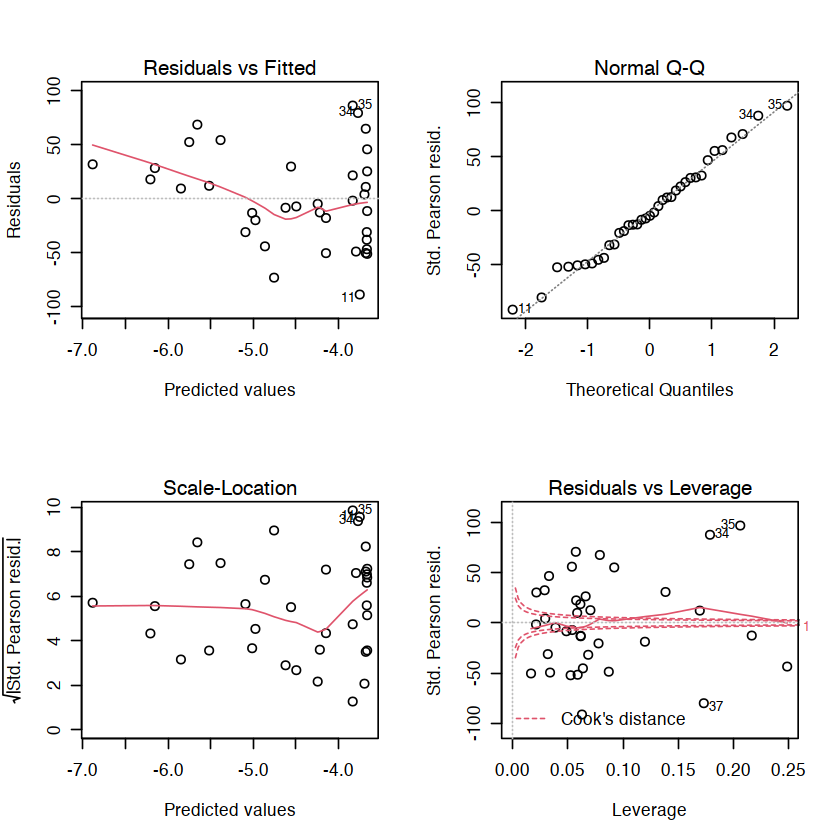

In [6]:
#only individuals with known age
data.playage<-read.csv("monthsPLAYsecond.csv",header=T)
head(data.playage)
table(data.playage$GROUP)#33 individuals from AGA the other 4 from PLA
table(data.playage$GROUP,data.playage$CLASS)

#use cbind for seconds playing vs second not playing for a binomial regression on social play
play.cb<-cbind(data.playage$TOTAL_PLAY,data.playage$OBSTIMESECS)
#build the model
model.con4b<-glm(play.cb~poly(MONTHS,2),
                 data=data.playage,
                 family = binomial(link = "logit"))
#poly(MONTHS,3)
#MONTHS+I(MONTHS^2)

summary(model.con4b)
confint(model.con4b, level=0.95)
par(mfrow=c(2,2))
plot(model.con4b)
par(mfrow=c(1,1))#all looks fine

#plot the age model
newdata.months<- data.frame(MONTHS= seq(3,120,1))
predicted.months<- predict(model.con4b,newdata=newdata.months,                           type="response",se=T)#regression line
predicted.months.int<- predict(model.con4b,
                           newdata=newdata.months,
                           type="response",ic=T)#CIs


	Kruskal-Wallis rank sum test

data:  X.PLAYTOTAL by CLASS
Kruskal-Wallis chi-squared = 18.978, df = 3, p-value = 0.0002762


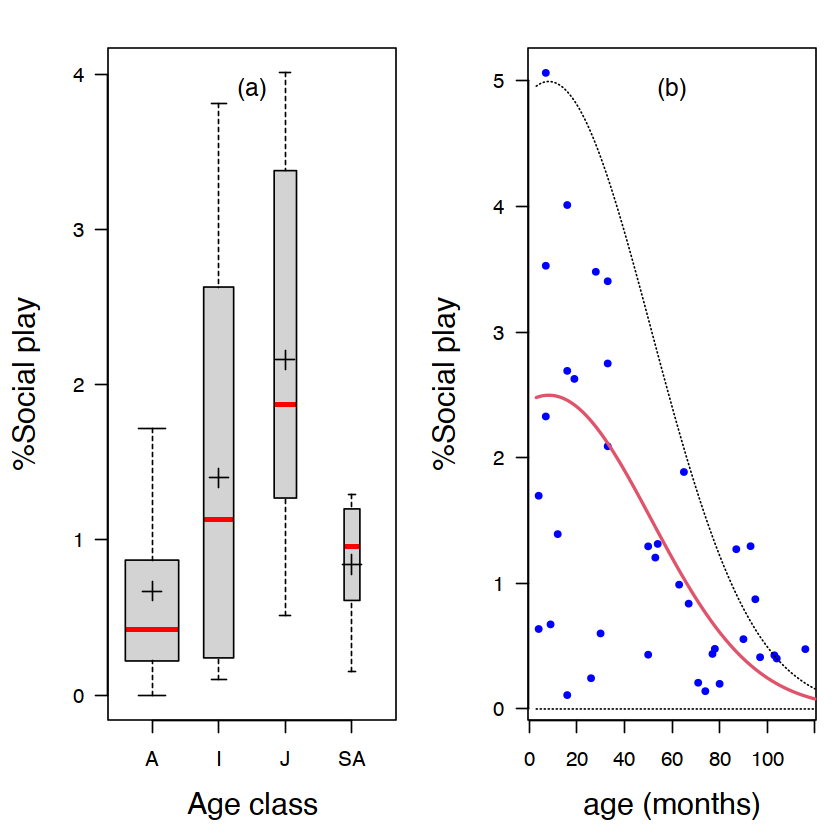

In [8]:
#####FIGURE 1
#par(mar = c(bottom, left, top, right)) 
#two plots together
par(mar=c(5,4.5,2,1),cex.lab=2)
par(mfrow=c(1,2))


setwd("~/Documents/R scripts and data/PLAY")#set directory
data.ptime<-read.csv2("playage.csv",header=T)#enter data play by age and class

boxplot(data.ptime$X.PLAYTOTAL ~ data.ptime$CLASS,las=1,
                   ylab="%Social play" ,
                   xlab="Age class",outline=FALSE,
        cex.lab=1.5,medcol="red",
        varwidth = TRUE,
        col = "lightgray")
title("(a)", adj = 0.5, line = -2)
points(c(0.67,1.40,2.16,0.842),pch=3,cex=1.5)
plot(data.playage$MONTHS,data.playage$PLAY.P,las=1,
     pch = 16,
     col="blue",xlab = "age (months)",cex=0.76, 
     ylab = "%Social play",cex.lab=1.5)
title("(b)", adj = 0.5, line = -2)
lines(newdata.months$MONTHS, predicted.months$fit*100,lwd=2,col=2)
lines(newdata.months$MONTHS, predicted.months$fit*100+
        predicted.months.int*100,lty=3)
lines(newdata.months$MONTHS, predicted.months$fit*100-
        predicted.months.int*100,lty=3)

kruskal.test(X.PLAYTOTAL ~ CLASS,data=data.ptime)


,ID,SEX,SITE,Subsp,HABITAT,AREA,DENS,GR,FEM,MAL,⋯,PLAYSEC,OBSSEC,IM.RATIO,NOPLAYSECS,ad_ad_play,ad_im_play,mix_play,non_ad_ad_play,non_ad_im_play,non_mix_play
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,⋯,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,amp,f,AGA,mexicana,SEMIDEC,8.3,9.5,24,14,5,⋯,2043,118800,0.2105263,116757,1383,240,420,117417,118560,118380
2,amr,f,AGA,mexicana,SEMIDEC,8.3,9.5,24,12,6,⋯,12705,496800,0.2777778,484095,1310,9775,1620,495490,487025,495180
3,azt,f,AGA,mexicana,SEMIDEC,8.3,9.5,24,12,6,⋯,3990,331200,0.2777778,327210,2390,1250,350,328810,329950,330850
4,cha,f,AGA,mexicana,SEMIDEC,8.3,9.5,24,13,7,⋯,1770,136800,0.2500000,135030,1480,40,250,135320,136760,136550
5,chu,m,AGA,mexicana,SEMIDEC,8.3,9.5,20,12,5,⋯,725,176040,0.2941176,175315,335,390,0,175705,175650,176040
6,cri,m,AGA,mexicana,SEMIDEC,8.3,9.5,24,12,8,⋯,360,75600,0.2500000,75240,360,0,0,75240,75600,75600


[1] 62 26


 f  m 
40 22 


	Friedman rank sum test

data:  play.per and type and id
Friedman chi-squared = 39.909, df = 2, p-value = 2.157e-09



	Kruskal-Wallis rank sum test

data:  X.PLAY by Subsp
Kruskal-Wallis chi-squared = 13.839, df = 1, p-value = 0.0001991



	Kruskal-Wallis rank sum test

data:  ad_ad_play by SITE
Kruskal-Wallis chi-squared = 28.992, df = 6, p-value = 6.104e-05



	Kruskal-Wallis rank sum test

data:  ad_im_play by SITE
Kruskal-Wallis chi-squared = 19.124, df = 6, p-value = 0.003959



	Kruskal-Wallis rank sum test

data:  ad_ad_play by Subsp
Kruskal-Wallis chi-squared = 0.11525, df = 1, p-value = 0.7342



	Kruskal-Wallis rank sum test

data:  ad_im_play by Subsp
Kruskal-Wallis chi-squared = 0.51396, df = 1, p-value = 0.4734


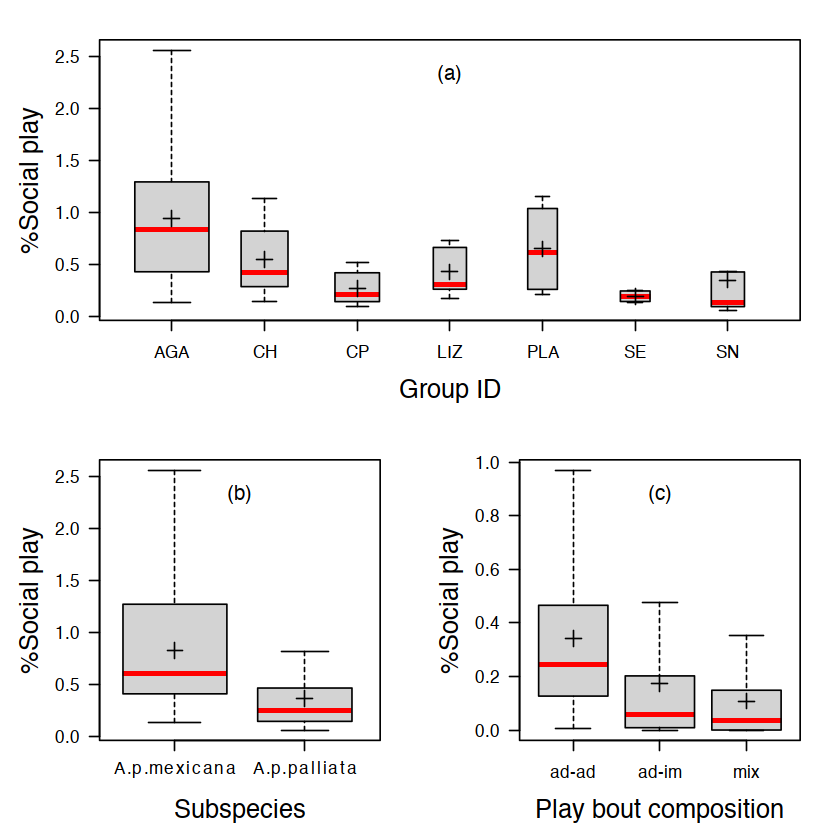

In [9]:
setwd("~/Documents/R scripts and data/PLAY")
data.ptime<-read.csv("playdatabytype.csv",header=T)
head(data.ptime)
dim(data.ptime)
table(data.ptime$SEX)

#FIGURE2
#arrange plots
par(mar=c(5,5,2,2),cex.lab=1.5)
layout(matrix(c(1,1,2,3), 2, 2, byrow = TRUE))



###adult social play by SITE
boxplot(X.PLAY ~ SITE, data = data.ptime,
        xlab = "Group ID", ylab = "%Social play",
        varwidth = TRUE,
        col = "lightgray",outline=F,medcol="red",
        las=1)
title("(a)", adj = 0.5, line = -2)
means <- tapply(data.ptime$X.PLAY,data.ptime$SITE,mean)
points(means,pch=3,
       cex=1.5)

####adult social play subspecies
boxplot(X.PLAY ~ Subsp, data = data.ptime,
        xlab = "Subspecies", ylab = "%Social play",
        varwidth = TRUE,
        col = "lightgray",outline=F,medcol="red",
        xaxt = "n",las=1)
xtick<-seq(1, 2, by=1)
title("(b)", adj = 0.5, line = -2)
axis(side=1, at=xtick, labels = c(expression(italic(A.p.mexicana)),
                                  expression(italic(A.p.palliata))))
means <- tapply(data.ptime$X.PLAY,data.ptime$Subsp,mean)
points(c(0.83,0.37),pch=3,
       cex=1.5)
#https://r-coder.com/plot-r/
#https://r-graphics.org


####adult social play by type
data.types<-read.csv("play types onlyb.csv",
                     header=T)
boxplot(play.per ~ type, data = data.types,
        xlab = "Play bout composition", ylab = "%Social play",
        varwidth = TRUE,
        col = "lightgray",outline=F,medcol="red",las=1)
title("(c)", adj = 0.5, line = -2)
means <- tapply(data.types$play.per,data.types$X,mean)
points(c(0.34,0.175,0.108),pch=3,
       cex=1.5)
#ylab=expression(italic("Sciurus vulgaris  ") (Presence/Absence)))



####adult social play by type repeated measures Friedman ANOVA test
friedman.test(play.per~type |id,data=data.types)
kruskal.test(X.PLAY~Subsp,data=data.ptime)#adult play by subspecies
kruskal.test(ad_ad_play~SITE,data=data.ptime)#adult adult play by site
kruskal.test(ad_im_play~SITE,data=data.ptime)#adult immature play by site
kruskal.test(ad_ad_play~Subsp,data=data.ptime)#adult adult play by subsp
kruskal.test(ad_im_play~Subsp,data=data.ptime)

In [10]:
####SOCIAL PLAY AMONG ADULTS

In [11]:
#create number of adults variable
adults<-data.ptime$GR-data.ptime$IMM
data.ptime$adults<-adults
head(data.ptime)

#put together ad-ad play seconds and non play seconds (rest of obs time)
cb.pt<-cbind(data.ptime$ad_ad_play,data.ptime$non_ad_ad_play)

#standarize predictors
#substract mean and divide by SD
#density
mean.dens<-mean(data.ptime$DENS)
sd.dens<-sd(data.ptime$DENS)
z.dens<-(data.ptime$DENS-mean.dens)/sd.dens

#group size (adults)
mean.gr<-mean(data.ptime$adults)
sd.gr<-sd(data.ptime$adults)
z.gr<-(data.ptime$GR-mean.gr)/sd.gr

#feeding on fruit
mean.fe<-mean(data.ptime$X.FE)
sd.fe<-sd(data.ptime$X.FE)
z.fe<-(data.ptime$X.FE-mean.fe)/sd.fe

#travel
mean.tr<-mean(data.ptime$X.TR)
sd.tr<-sd(data.ptime$X.TR)
z.tr<-(data.ptime$X.TR-mean.tr)/sd.tr

#immature ratio
mean.ir<-mean(data.ptime$IM.RATIO)
sd.ir<-sd(data.ptime$IM.RATIO)
z.ir<-(data.ptime$IM.RATIO-mean.ir)/sd.ir

#area log and standarized
log.a<-log10(data.ptime$AREA)
mean.area<-mean(log.a)
sd.area<-sd(log.a)
z.area<-(log.a-mean.area)/sd.area

library(lme4)
#full model adult-adult play
full.ad.ad<-glmer(cb.pt~z.ir+z.gr+z.fe+z.tr+z.dens+SEX+z.area+(1|SITE),family=binomial,data=data.ptime)

summary(full.ad.ad)

library(ggplot2)
library(broom.mixed)
library(dplyr)

# Extract coefficents
lmer_coef <-
  tidy(full.ad.ad, conf.int = TRUE)
head(lmer_coef)


# first 5 observations
DATA <- lmer_coef[2:8,]
DATA$low.dif<-abs(DATA$estimate-DATA$conf.low)
DATA$up.dif<-abs(DATA$conf.high-DATA$estimate)
  
head(DATA,7)

par(mfrow=c(1,1))
my.data<-data.frame(terms=c("immature to adult ratio","group size",
                            "%feeding fruit","%travel","howler density",
                            "sex","study area"),estimate=DATA$estimate,
                    low=DATA$low.dif,up=DATA$up.dif)
head(my.data)


,ID,SEX,SITE,Subsp,HABITAT,AREA,DENS,GR,FEM,MAL,⋯,OBSSEC,IM.RATIO,NOPLAYSECS,ad_ad_play,ad_im_play,mix_play,non_ad_ad_play,non_ad_im_play,non_mix_play,adults
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,⋯,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,amp,f,AGA,mexicana,SEMIDEC,8.3,9.5,24,14,5,⋯,118800,0.2105263,116757,1383,240,420,117417,118560,118380,20
2,amr,f,AGA,mexicana,SEMIDEC,8.3,9.5,24,12,6,⋯,496800,0.2777778,484095,1310,9775,1620,495490,487025,495180,19
3,azt,f,AGA,mexicana,SEMIDEC,8.3,9.5,24,12,6,⋯,331200,0.2777778,327210,2390,1250,350,328810,329950,330850,19
4,cha,f,AGA,mexicana,SEMIDEC,8.3,9.5,24,13,7,⋯,136800,0.2500000,135030,1480,40,250,135320,136760,136550,19
5,chu,m,AGA,mexicana,SEMIDEC,8.3,9.5,20,12,5,⋯,176040,0.2941176,175315,335,390,0,175705,175650,176040,15
6,cri,m,AGA,mexicana,SEMIDEC,8.3,9.5,24,12,8,⋯,75600,0.2500000,75240,360,0,0,75240,75600,75600,19


Loading required package: Matrix



Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: cb.pt ~ z.ir + z.gr + z.fe + z.tr + z.dens + SEX + z.area + (1 |  
    SITE)
   Data: data.ptime

     AIC      BIC   logLik deviance df.resid 
 25783.3  25802.4 -12882.6  25765.3       53 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-47.885 -12.357  -0.999  11.867  83.132 

Random effects:
 Groups Name        Variance Std.Dev.
 SITE   (Intercept) 0.8235   0.9074  
Number of obs: 62, groups:  SITE, 7

Fixed effects:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -6.435018   0.425854 -15.111  < 2e-16 ***
z.ir        -1.320789   0.029372 -44.968  < 2e-16 ***
z.gr         0.529555   0.023859  22.195  < 2e-16 ***
z.fe         0.158159   0.014718  10.746  < 2e-16 ***
z.tr         0.011533   0.003727   3.094  0.00197 ** 
z.dens      -0.849464   0.708977  -1.198  0.23086    
SEXm        -0.371757   0.008263 -44.993  < 2e-16 ***

Registered S3 method overwritten by 'broom.mixed':
  method      from 
  tidy.gamlss broom



effect,group,term,estimate,std.error,statistic,p.value,conf.low,conf.high
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
fixed,NA,(Intercept),-6.43501769,0.425854164,-15.110848,1.373599e-51,-7.269676509,-5.60035886
fixed,NA,z.ir,-1.32078867,0.029371596,-44.968230,0.000000e+00,-1.378355944,-1.26322140
fixed,NA,z.gr,0.52955501,0.023858864,22.195315,3.811674e-109,0.482792499,0.57631753
fixed,NA,z.fe,0.15815893,0.014717517,10.746305,6.168341e-27,0.129313125,0.18700473
fixed,NA,z.tr,0.01153295,0.003727066,3.094378,1.972261e-03,0.004228036,0.01883787
fixed,NA,z.dens,-0.84946410,0.708976664,-1.198155,2.308566e-01,-2.239032826,0.54010463


effect,group,term,estimate,std.error,statistic,p.value,conf.low,conf.high,low.dif,up.dif
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
fixed,NA,z.ir,-1.32078867,0.029371596,-44.968230,0.000000e+00,-1.378355944,-1.26322140,0.057567270,0.057567270
fixed,NA,z.gr,0.52955501,0.023858864,22.195315,3.811674e-109,0.482792499,0.57631753,0.046762514,0.046762514
fixed,NA,z.fe,0.15815893,0.014717517,10.746305,6.168341e-27,0.129313125,0.18700473,0.028845804,0.028845804
fixed,NA,z.tr,0.01153295,0.003727066,3.094378,1.972261e-03,0.004228036,0.01883787,0.007304916,0.007304916
fixed,NA,z.dens,-0.84946410,0.708976664,-1.198155,2.308566e-01,-2.239032826,0.54010463,1.389568728,1.389568728
fixed,NA,SEXm,-0.37175740,0.008262550,-44.993060,0.000000e+00,-0.387951702,-0.35556310,0.016194300,0.016194300
fixed,NA,z.area,-0.64162473,0.534188250,-1.201121,2.297043e-01,-1.688614462,0.40536500,1.046989732,1.046989732


,terms,estimate,low,up
,<chr>,<dbl>,<dbl>,<dbl>
1,immature to adult ratio,-1.32078867,0.057567270,0.057567270
2,group size,0.52955501,0.046762514,0.046762514
3,%feeding fruit,0.15815893,0.028845804,0.028845804
4,%travel,0.01153295,0.007304916,0.007304916
5,howler density,-0.84946410,1.389568728,1.389568728
6,sex,-0.37175740,0.016194300,0.016194300


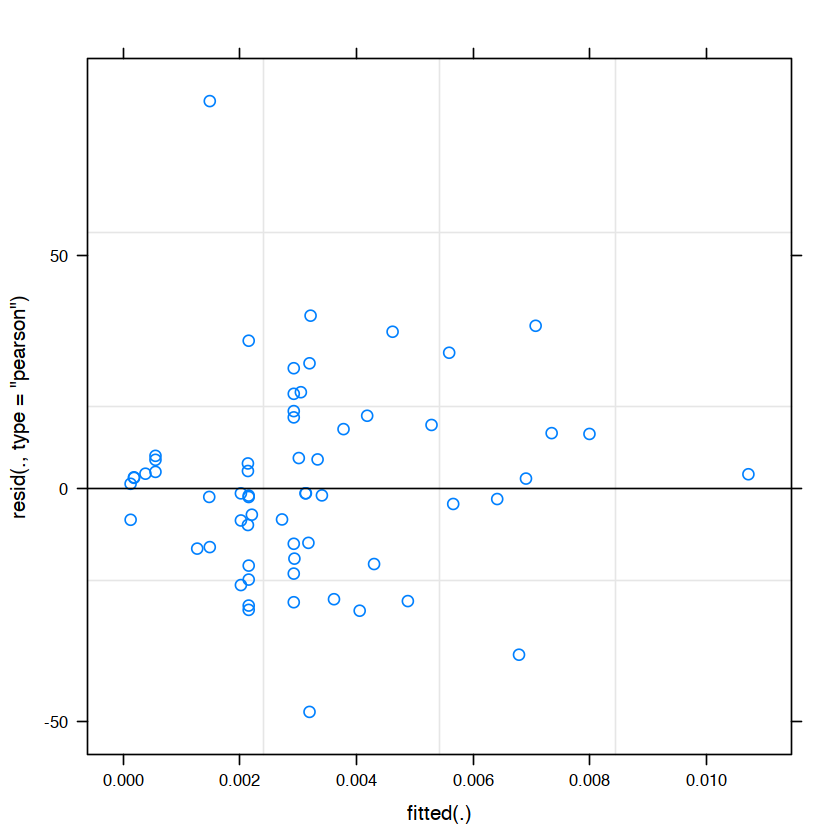

In [12]:
plot(full.ad.ad)

In [13]:
#for easier plotting % of social adult adult play
data.ptime$X.playim<-data.ptime$ad_ad_play/data.ptime$OBSSEC
#GROUP SIZE FEMALES
#Create a temporary data frame of hypothetical values

newdata.gr.f.aga <- data.frame(z.gr = seq(-1.99, 2.45,0.1),z.fe=mean(z.fe),
                                  z.ir=mean(z.ir),SITE="AGA",SEX="f",z.tr=mean(z.tr),
                               z.dens=mean(z.dens),z.area=mean(z.area))
newdata.gr.f.liz <- data.frame(z.gr = seq(-1.99, 2.45,0.1),z.fe=mean(z.fe),
                                  z.ir=mean(z.ir),SITE="LIZ",SEX="f",z.tr=mean(z.tr),
                               z.dens=mean(z.dens),z.area=mean(z.area))
newdata.gr.f.pla <- data.frame(z.gr = seq(-1.99,2.45,0.1),z.fe=mean(z.fe),
                                  z.ir=mean(z.ir),SITE="PLA",SEX="f",z.tr=mean(z.tr),
                               z.dens=mean(z.dens),z.area=mean(z.area))
newdata.gr.f.ch <- data.frame(z.gr = seq(-1.99,2.45, 0.1),z.fe=mean(z.fe),
                               z.ir=mean(z.ir),SITE="CH",SEX="f",z.tr=mean(z.tr),
                              z.dens=mean(z.dens),z.area=mean(z.area))
newdata.gr.f.cp <- data.frame(z.gr = seq(-1.99,2.45, 0.1),z.fe=mean(z.fe),
                               z.ir=mean(z.ir),SITE="CP",SEX="f",z.tr=mean(z.tr),
                              z.dens=mean(z.dens),z.area=mean(z.area))
newdata.gr.f.se <- data.frame(z.gr = seq(-1.99,2.45, 0.1),z.fe=mean(z.fe),
                               z.ir=mean(z.ir),SITE="SE",SEX="f",z.tr=mean(z.tr),
                              z.dens=mean(z.dens),z.area=mean(z.area))
newdata.gr.f.sn <- data.frame(z.gr = seq(-1.99,2.45, 0.1),z.fe=mean(z.fe),
                               z.ir=mean(z.ir),SITE="SN",SEX="f",z.tr=mean(z.tr),
                              z.dens=mean(z.dens),z.area=mean(z.area))

predicted.gr.f.aga <- predict(full.ad.ad,newdata=newdata.gr.f.aga,type="response")
predicted.gr.f.liz <- predict(full.ad.ad,newdata=newdata.gr.f.liz,type="response")
predicted.gr.f.pla <- predict(full.ad.ad,newdata=newdata.gr.f.pla,type="response")
predicted.gr.f.ch <- predict(full.ad.ad,newdata=newdata.gr.f.ch,type="response")
predicted.gr.f.cp <- predict(full.ad.ad,newdata=newdata.gr.f.cp,type="response")
predicted.gr.f.se <- predict(full.ad.ad,newdata=newdata.gr.f.se,type="response")
predicted.gr.f.sn <- predict(full.ad.ad,newdata=newdata.gr.f.sn,type="response")

newdata.gr.m.aga <- data.frame(z.gr = seq(-1.99, 2.45,0.1),z.fe=mean(z.fe),
                               z.ir=mean(z.ir),SITE="AGA",SEX="m",z.tr=mean(z.tr),
                               z.dens=mean(z.dens),z.area=mean(z.area))
newdata.gr.m.liz <- data.frame(z.gr = seq(-1.99, 2.45,0.1),z.fe=mean(z.fe),
                               z.ir=mean(z.ir),SITE="LIZ",SEX="m",z.tr=mean(z.tr),
                               z.dens=mean(z.dens),z.area=mean(z.area))
newdata.gr.m.pla <- data.frame(z.gr = seq(-1.99,2.45,0.1),z.fe=mean(z.fe),
                               z.ir=mean(z.ir),SITE="PLA",SEX="m",z.tr=mean(z.tr),
                               z.dens=mean(z.dens),z.area=mean(z.area))
newdata.gr.m.ch <- data.frame(z.gr = seq(-1.99,2.45, 0.1),z.fe=mean(z.fe),
                              z.ir=mean(z.ir),SITE="CH",SEX="m",z.tr=mean(z.tr),
                              z.dens=mean(z.dens),z.area=mean(z.area))
newdata.gr.m.cp <- data.frame(z.gr = seq(-1.99,2.45, 0.1),z.fe=mean(z.fe),
                              z.ir=mean(z.ir),SITE="CP",SEX="m",z.tr=mean(z.tr),
                              z.dens=mean(z.dens),z.area=mean(z.area))
newdata.gr.m.se <- data.frame(z.gr = seq(-1.99,2.45, 0.1),z.fe=mean(z.fe),
                              z.ir=mean(z.ir),SITE="SE",SEX="m",z.tr=mean(z.tr),
                              z.dens=mean(z.dens),z.area=mean(z.area))
newdata.gr.m.sn <- data.frame(z.gr = seq(-1.99,2.45, 0.1),z.fe=mean(z.fe),
                              z.ir=mean(z.ir),SITE="SN",SEX="m",z.tr=mean(z.tr),
                              z.dens=mean(z.dens),z.area=mean(z.area))


predicted.gr.m.aga <- predict(full.ad.ad,newdata=newdata.gr.m.aga,type="response")
predicted.gr.m.liz <- predict(full.ad.ad,newdata=newdata.gr.m.liz,type="response")
predicted.gr.m.pla <- predict(full.ad.ad,newdata=newdata.gr.m.pla,type="response")
predicted.gr.m.ch <- predict(full.ad.ad,newdata=newdata.gr.m.ch,type="response")
predicted.gr.m.cp <- predict(full.ad.ad,newdata=newdata.gr.m.cp,type="response")
predicted.gr.m.se <- predict(full.ad.ad,newdata=newdata.gr.m.se,type="response")
predicted.gr.m.sn <- predict(full.ad.ad,newdata=newdata.gr.m.sn,type="response")

#FEMALES IR
newdata.ir.f.aga <- data.frame(z.gr = mean(z.gr),z.fe=mean(z.fe),
                               z.ir=seq(-2.08,7.4,0.1),SITE="AGA",SEX="f",z.tr=mean(z.tr),
                               z.dens=mean(z.dens),z.area=mean(z.area))
newdata.ir.f.liz <- data.frame(z.gr = mean(z.gr),z.fe=mean(z.fe),
                               z.ir=seq(-2.08,7.4,0.1),SITE="LIZ",SEX="f",z.tr=mean(z.tr),
                               z.dens=mean(z.dens),z.area=mean(z.area))
newdata.ir.f.pla <- data.frame(z.gr = mean(z.gr),z.fe=mean(z.fe),
                               z.ir=seq(-2.08,7.4,0.1),SITE="PLA",SEX="f",z.tr=mean(z.tr),
                               z.dens=mean(z.dens),z.area=mean(z.area))
newdata.ir.f.ch <- data.frame(z.gr = mean(z.gr),z.fe=mean(z.fe),
                              z.ir=seq(-2.08,7.4,0.1),SITE="CH",SEX="f",z.tr=mean(z.tr),
                              z.dens=mean(z.dens),z.area=mean(z.area))
newdata.ir.f.cp <- data.frame(z.gr = mean(z.gr),z.fe=mean(z.fe),
                              z.ir=seq(-2.08,7.4,0.1),SITE="CP",SEX="f",z.tr=mean(z.tr),
                              z.dens=mean(z.dens),z.area=mean(z.area))
newdata.ir.f.se <- data.frame(z.gr = mean(z.gr),z.fe=mean(z.fe),
                              z.ir=seq(-2.08,7.4,0.1),SITE="SE",SEX="f",z.tr=mean(z.tr),
                              z.dens=mean(z.dens),z.area=mean(z.area))
newdata.ir.f.sn <- data.frame(z.gr = mean(z.gr),z.fe=mean(z.fe),
                              z.ir=seq(-2.08,7.4,0.1),SITE="SN",SEX="f",z.tr=mean(z.tr),
                              z.dens=mean(z.dens),z.area=mean(z.area))


predicted.ir.f.aga <- predict(full.ad.ad,newdata=newdata.ir.f.aga,type="response")
predicted.ir.f.liz <- predict(full.ad.ad,newdata=newdata.ir.f.liz,type="response")
predicted.ir.f.pla <- predict(full.ad.ad,newdata=newdata.ir.f.pla,type="response")
predicted.ir.f.ch <- predict(full.ad.ad,newdata=newdata.ir.f.ch,type="response")
predicted.ir.f.cp <- predict(full.ad.ad,newdata=newdata.ir.f.cp,type="response")
predicted.ir.f.se <- predict(full.ad.ad,newdata=newdata.ir.f.se,type="response")
predicted.ir.f.sn <- predict(full.ad.ad,newdata=newdata.ir.f.sn,type="response")

######IR ON MALES
# Create a temporary data frame of hypothetical values

newdata.ir.m.aga <- data.frame(z.gr = mean(z.gr),z.fe=mean(z.fe),
                               z.ir=seq(-2.08,7.4,0.1),SITE="AGA",SEX="m",z.tr=mean(z.tr),
                               z.dens=mean(z.dens),z.area=mean(z.area))
newdata.ir.m.liz <- data.frame(z.gr = mean(z.gr),z.fe=mean(z.fe),
                               z.ir=seq(-2.08,7.4,0.1),SITE="LIZ",SEX="m",z.tr=mean(z.tr),
                               z.dens=mean(z.dens),z.area=mean(z.area))
newdata.ir.m.pla <- data.frame(z.gr = mean(z.gr),z.fe=mean(z.fe),
                               z.ir=seq(-2.08,7.4,0.1),SITE="PLA",SEX="m",z.tr=mean(z.tr),
                               z.dens=mean(z.dens),z.area=mean(z.area))
newdata.ir.m.ch <- data.frame(z.gr = mean(z.gr),z.fe=mean(z.fe),
                              z.ir=seq(-2.08,7.4,0.1),SITE="CH",SEX="m",z.tr=mean(z.tr),
                              z.dens=mean(z.dens),z.area=mean(z.area))
newdata.ir.m.cp <- data.frame(z.gr = mean(z.gr),z.fe=mean(z.fe),
                              z.ir=seq(-2.08,7.4,0.1),SITE="CP",SEX="m",z.tr=mean(z.tr),
                              z.dens=mean(z.dens),z.area=mean(z.area))
newdata.ir.m.se <- data.frame(z.gr = mean(z.gr),z.fe=mean(z.fe),
                              z.ir=seq(-2.08,7.4,0.1),SITE="SE",SEX="m",z.tr=mean(z.tr),
                              z.dens=mean(z.dens),z.area=mean(z.area))
newdata.ir.m.sn <- data.frame(z.gr = mean(z.gr),z.fe=mean(z.fe),
                              z.ir=seq(-2.08,7.4,0.1),SITE="SN",SEX="m",z.tr=mean(z.tr),
                              z.dens=mean(z.dens),z.area=mean(z.area))


predicted.ir.m.aga <- predict(full.ad.ad,newdata=newdata.ir.m.aga,type="response")
predicted.ir.m.liz <- predict(full.ad.ad,newdata=newdata.ir.m.liz,type="response")
predicted.ir.m.pla <- predict(full.ad.ad,newdata=newdata.ir.m.pla,type="response")
predicted.ir.m.ch <- predict(full.ad.ad,newdata=newdata.ir.m.ch,type="response")
predicted.ir.m.cp <- predict(full.ad.ad,newdata=newdata.ir.m.cp,type="response")
predicted.ir.m.se <- predict(full.ad.ad,newdata=newdata.ir.m.se,type="response")
predicted.ir.m.sn <- predict(full.ad.ad,newdata=newdata.ir.m.sn,type="response")

###########FEMALES feeding
# Create a temporary data frame of hypothetical values

newdata.fe.f.aga <- data.frame(z.gr = mean(z.gr),z.fe=seq(-1.71,7, 0.1),
                               z.ir=mean(z.ir),SITE="AGA",SEX="f",z.tr=mean(z.tr),
                               z.dens=mean(z.dens),z.area=mean(z.area))
newdata.fe.f.liz <- data.frame(z.gr = mean(z.gr),z.fe=seq(-1.71,7, 0.1),
                               z.ir=mean(z.ir),SITE="LIZ",SEX="f",z.tr=mean(z.tr),
                               z.dens=mean(z.dens),z.area=mean(z.area))
newdata.fe.f.pla <- data.frame(z.gr = mean(z.gr),z.fe=seq(-1.71,7, 0.1),
                               z.ir=mean(z.ir),SITE="PLA",SEX="f",z.tr=mean(z.tr),
                               z.dens=mean(z.dens),z.area=mean(z.area))
newdata.fe.f.ch <- data.frame(z.gr = mean(z.gr),z.fe=seq(-1.71,7, 0.1),
                              z.ir=mean(z.ir),SITE="CH",SEX="f",z.tr=mean(z.tr),
                              z.dens=mean(z.dens),z.area=mean(z.area))
newdata.fe.f.cp <- data.frame(z.gr = mean(z.gr),z.fe=seq(-1.71,7, 0.1),
                              z.ir=mean(z.ir),SITE="CP",SEX="f",z.tr=mean(z.tr),
                              z.dens=mean(z.dens),z.area=mean(z.area))
newdata.fe.f.se <- data.frame(z.gr = mean(z.gr),z.fe=seq(-1.71,7, 0.1),
                              z.ir=mean(z.ir),SITE="SE",SEX="f",z.tr=mean(z.tr),
                              z.dens=mean(z.dens),z.area=mean(z.area))
newdata.fe.f.sn <- data.frame(z.gr = mean(z.gr),z.fe=seq(-1.71,7, 0.1),
                              z.ir=mean(z.ir),SITE="SN",SEX="f",z.tr=mean(z.tr),
                              z.dens=mean(z.dens),z.area=mean(z.area))

predicted.fe.f.aga <- predict(full.ad.ad,newdata=newdata.fe.f.aga,type="response")
predicted.fe.f.liz <- predict(full.ad.ad,newdata=newdata.fe.f.liz,type="response")
predicted.fe.f.pla <- predict(full.ad.ad,newdata=newdata.fe.f.pla,type="response")
predicted.fe.f.ch <- predict(full.ad.ad,newdata=newdata.fe.f.ch,type="response")
predicted.fe.f.cp <- predict(full.ad.ad,newdata=newdata.fe.f.cp,type="response")
predicted.fe.f.se <- predict(full.ad.ad,newdata=newdata.fe.f.se,type="response")
predicted.fe.f.sn <- predict(full.ad.ad,newdata=newdata.fe.f.sn,type="response")

#######NOW MALES FEEDING

newdata.fe.m.aga <- data.frame(z.gr = mean(z.gr),z.fe=seq(-1.71,7, 0.1),
                               z.ir=mean(z.ir),SITE="AGA",SEX="m",z.tr=mean(z.tr),
                               z.dens=mean(z.dens),z.area=mean(z.area))
newdata.fe.m.liz <- data.frame(z.gr = mean(z.gr),z.fe=seq(-1.71,7, 0.1),
                               z.ir=mean(z.ir),SITE="LIZ",SEX="m",z.tr=mean(z.tr),
                               z.dens=mean(z.dens),z.area=mean(z.area))
newdata.fe.m.pla <- data.frame(z.gr = mean(z.gr),z.fe=seq(-1.71,7, 0.1),
                               z.ir=mean(z.ir),SITE="PLA",SEX="m",z.tr=mean(z.tr),
                               z.dens=mean(z.dens),z.area=mean(z.area))
newdata.fe.m.ch <- data.frame(z.gr = mean(z.gr),z.fe=seq(-1.71,7, 0.1),
                              z.ir=mean(z.ir),SITE="CH",SEX="m",z.tr=mean(z.tr),
                              z.dens=mean(z.dens),z.area=mean(z.area))
newdata.fe.m.cp <- data.frame(z.gr = mean(z.gr),z.fe=seq(-1.71,7, 0.1),
                              z.ir=mean(z.ir),SITE="CP",SEX="m",z.tr=mean(z.tr),
                              z.dens=mean(z.dens),z.area=mean(z.area))
newdata.fe.m.se <- data.frame(z.gr = mean(z.gr),z.fe=seq(-1.71,7, 0.1),
                              z.ir=mean(z.ir),SITE="SE",SEX="m",z.tr=mean(z.tr),
                              z.dens=mean(z.dens),z.area=mean(z.area))
newdata.fe.m.sn <- data.frame(z.gr = mean(z.gr),z.fe=seq(-1.71,7, 0.1),
                              z.ir=mean(z.ir),SITE="SN",SEX="m",z.tr=mean(z.tr),
                              z.dens=mean(z.dens),z.area=mean(z.area))

predicted.fe.m.aga <- predict(full.ad.ad,newdata=newdata.fe.m.aga,type="response")
predicted.fe.m.liz <- predict(full.ad.ad,newdata=newdata.fe.m.liz,type="response")
predicted.fe.m.pla <- predict(full.ad.ad,newdata=newdata.fe.m.pla,type="response")
predicted.fe.m.ch <- predict(full.ad.ad,newdata=newdata.fe.m.ch,type="response")
predicted.fe.m.cp <- predict(full.ad.ad,newdata=newdata.fe.m.cp,type="response")
predicted.fe.m.se <- predict(full.ad.ad,newdata=newdata.fe.m.se,type="response")
predicted.fe.m.sn <- predict(full.ad.ad,newdata=newdata.fe.m.sn,type="response")


1,1,1,2,2,2
3,3,4,4,5,5
3,3,4,4,5,5
3,3,6,6,7,7
3,3,6,6,7,7
3,3,8,8,9,9
3,3,8,8,9,9


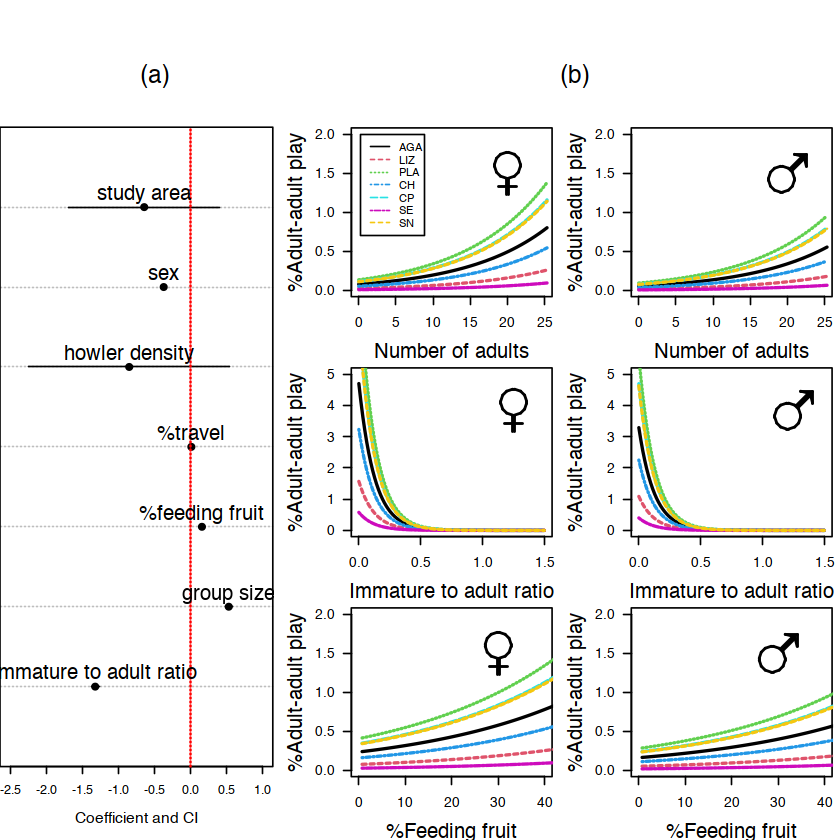

In [14]:
mat <- matrix(c(1,1,1,2,2,2,
                3,3,4,4,5,5,
                3,3,4,4,5,5,
                3,3,6,6,7,7,
                3,3,6,6,7,7,
                3,3,8,8,9,9,
                3,3,8,8,9,9),
              nrow = 7, byrow = TRUE)
mat

layout(mat)
par(mar = c(2, 2, 0, 2))
plot(1:10, 1:10, axes=FALSE, ylab="", xlab="", type="n")
text(4,2,"(a)",cex=1.8)
plot(1:10, 1:10, axes=FALSE, ylab="", xlab="", type="n")
text(4,2,"(b)",cex=1.8)


par(mar = c(5.1, 0, 0.5, 0.5))
dotchart(my.data$estimate,xlim=c(-2.5,1),pch=21,
         cex=0.60,bg="black",
         xlab = "Coefficient and CI",
         cex.lab=1.25)
segments(my.data$estimate-my.data$low, 1:7, my.data$estimate+my.data$up, 1:7)
abline(v=0,col="red",lwd=1.5,lty=3)
text(x = c(my.data$estimate),
     y = c(1,2,3,4,5,6,7),
     labels = my.data$terms,pos = 3,cex = 1.5)

par(mar = c(4, 4.5, 0.5, 0.5))
#bottom, left, top, and right. The default is c(5.1, 4.1, 4.1, 2.1).

#group size on females
plot((z.gr*sd.gr)+mean.gr,data.ptime$X.playim*100, pch = 16,
     col="white",xlab = "Number of adults",ylab="%Adult-adult play", 
     ylim=c(0,2),xlim=c(0,25),cex.lab=1.5,las=1)
lines((newdata.gr.f.aga$z.gr*sd.gr)+mean.gr, predicted.gr.f.aga*100,
      lwd=2,col=1,lty=1,type="l",pch=1)
lines((newdata.gr.f.liz$z.gr*sd.gr)+mean.gr, predicted.gr.f.liz*100,
      lwd=2,col=2,lty=2,type="l",pch=2)
lines((newdata.gr.f.pla$z.gr*sd.gr)+mean.gr, predicted.gr.f.pla*100,
      lwd=2,col=3,lty=3,type="l",pch=3)
lines((newdata.gr.f.ch$z.gr*sd.gr)+mean.gr, predicted.gr.f.ch*100,
      lwd=2,col=4,lty=4,type="l",pch=4)
lines((newdata.gr.f.cp$z.gr*sd.gr)+mean.gr, predicted.gr.f.cp*100,
      lwd=2,col=5,lty=5,type="l",pch=5)
lines((newdata.gr.f.se$z.gr*sd.gr)+mean.gr, predicted.gr.f.se*100,
      lwd=2,col=6,lty=6,type="l",pch=6)
lines((newdata.gr.f.sn$z.gr*sd.gr)+mean.gr, predicted.gr.f.sn*100,
      lwd=2,col=7,lty=2,type="o",pch=18,cex=0.5)

text(20,1.5,labels='\\VE',
     vfont=c("sans serif","bold"),cex=5)
legend(0.25,2, legend=c("AGA","LIZ","PLA","CH","CP","SE","SN"),
       col=c(1,2,3,4,5,6,7), lty=c(1,2,3,4,5,6,2), cex=0.8,
       box.lty=1,lwd=1)
#group size and males
plot((z.gr*sd.gr)+mean.gr,data.ptime$X.playim*100, pch = 16,
     col="white",xlab = "Number of adults",ylab="%Adult-adult play", 
     ylim=c(0,2),xlim=c(0,25),cex.lab=1.5,las=1)
lines((newdata.gr.m.aga$z.gr*sd.gr)+mean.gr, predicted.gr.m.aga*100,
      lwd=2,col=1,lty=1,type="l",pch=1)
lines((newdata.gr.m.liz$z.gr*sd.gr)+mean.gr, predicted.gr.m.liz*100,
      lwd=2,col=2,lty=2,type="l",pch=2)
lines((newdata.gr.m.pla$z.gr*sd.gr)+mean.gr, predicted.gr.m.pla*100,
      lwd=2,col=3,lty=3,type="l",pch=3)
lines((newdata.gr.m.ch$z.gr*sd.gr)+mean.gr, predicted.gr.m.ch*100,
      lwd=2,col=4,lty=4,type="l",pch=4)
lines((newdata.gr.m.cp$z.gr*sd.gr)+mean.gr, predicted.gr.m.cp*100,
      lwd=2,col=5,lty=5,type="l",pch=5)
lines((newdata.gr.m.se$z.gr*sd.gr)+mean.gr, predicted.gr.m.se*100,
      lwd=2,col=6,lty=6,type="l",pch=6)
lines((newdata.gr.m.sn$z.gr*sd.gr)+mean.gr, predicted.gr.m.sn*100,
      lwd=2,col=7,lty=2,type="o",pch=18,cex=0.5)
text(20,1.5,labels='\\MA',
     vfont=c("sans serif","bold"),cex=5)

#IR and males
plot((z.ir*sd.ir)+mean.ir,data.ptime$X.playim*100, pch = 16,
     col="white",xlab = "Immature to adult ratio",ylab="%Adult-adult play", 
     ylim=c(0,5),xlim=c(0,1.5),cex.lab=1.5,las=1)
lines((newdata.ir.f.aga$z.ir*sd.ir)+mean.ir, predicted.ir.f.aga*100,
      lwd=2,col=1,lty=1,type="l",pch=1)
lines((newdata.ir.f.liz$z.ir*sd.ir)+mean.ir, predicted.ir.f.liz*100,
      lwd=2,col=2,lty=2,type="l",pch=2)
lines((newdata.ir.f.pla$z.ir*sd.ir)+mean.ir, predicted.ir.f.pla*100,
      lwd=2,col=3,lty=3,type="l",pch=3)
lines((newdata.ir.f.ch$z.ir*sd.ir)+mean.ir, predicted.ir.f.ch*100,
      lwd=2,col=4,lty=4,type="l",pch=4)
lines((newdata.ir.f.cp$z.ir*sd.ir)+mean.ir, predicted.ir.f.cp*100,
      lwd=2,col=5,lty=5,type="l",pch=5)
lines((newdata.ir.f.se$z.ir*sd.ir)+mean.ir, predicted.ir.f.se*100,
      lwd=2,col=6,lty=6,type="l",pch=6)
lines((newdata.ir.f.sn$z.ir*sd.ir)+mean.ir, predicted.ir.f.sn*100,
      lwd=2,col=7,lty=2,type="o",pch=18,cex=0.5)

text(1.25,3.85,labels='\\VE',
     vfont=c("sans serif","bold"),cex=5)

#ir and females
plot((z.ir*sd.ir)+mean.ir,data.ptime$X.playim*100, pch = 16,
     col="white",xlab = "Immature to adult ratio",ylab="%Adult-adult play", 
     ylim=c(0,5),xlim=c(0,1.5),cex.lab=1.5,las=1)
lines((newdata.ir.m.aga$z.ir*sd.ir)+mean.ir, predicted.ir.m.aga*100,
      lwd=2,col=1,lty=1,type="l",pch=1)
lines((newdata.ir.m.liz$z.ir*sd.ir)+mean.ir, predicted.ir.m.liz*100,
      lwd=2,col=2,lty=2,type="l",pch=2)
lines((newdata.ir.m.pla$z.ir*sd.ir)+mean.ir, predicted.ir.m.pla*100,
      lwd=2,col=3,lty=3,type="l",pch=3)
lines((newdata.ir.m.ch$z.ir*sd.ir)+mean.ir, predicted.ir.m.ch*100,
      lwd=2,col=4,lty=4,type="l",pch=4)
lines((newdata.ir.m.cp$z.ir*sd.ir)+mean.ir, predicted.ir.m.cp*100,
      lwd=2,col=5,lty=5,type="l",pch=5)
lines((newdata.ir.m.se$z.ir*sd.ir)+mean.ir, predicted.ir.m.se*100,
      lwd=2,col=6,lty=6,type="l",pch=6)
lines((newdata.ir.m.sn$z.ir*sd.ir)+mean.ir, predicted.ir.m.sn*100,
      lwd=2,col=7,lty=2,type="o",pch=18,cex=0.5)
text(1.25,3.85,labels='\\MA',
     vfont=c("sans serif","bold"),cex=5)

plot(((z.fe*sd.fe)+mean.fe)*100,data.ptime$X.playim*100, pch = 16,
     col="white",xlab = "%Feeding fruit",las=1,
     ylab = "%Adult-adult play",ylim=c(0,2),xlim=c(0,40),cex.lab=1.5)
lines(((newdata.fe.f.aga$z.fe*sd.fe)+mean.fe)*100, predicted.fe.f.aga*100,
      lwd=2,col=1,lty=1,type="l",pch=1)
lines(((newdata.fe.f.aga$z.fe*sd.fe)+mean.fe)*100, predicted.fe.f.liz*100,
      lwd=2,col=2,lty=2,type="l",pch=2)
lines(((newdata.fe.f.aga$z.fe*sd.fe)+mean.fe)*100, predicted.fe.f.pla*100,
      lwd=2,col=3,lty=3,type="l",pch=3)
lines(((newdata.fe.f.aga$z.fe*sd.fe)+mean.fe)*100, predicted.fe.f.ch*100,
      lwd=2,col=4,lty=4,type="l",pch=4)
lines(((newdata.fe.f.aga$z.fe*sd.fe)+mean.fe)*100, predicted.fe.f.cp*100,
      lwd=2,col=5,lty=5,type="l",pch=5)
lines(((newdata.fe.f.aga$z.fe*sd.fe)+mean.fe)*100, predicted.fe.f.se*100,
      lwd=2,col=6,lty=6,type="l",pch=6)
lines(((newdata.fe.f.aga$z.fe*sd.fe)+mean.fe)*100, predicted.fe.f.sn*100,
      lwd=2,col=7,lty=2,type="o",pch=18,cex=0.5)
text(30,1.5,labels='\\VE',
     vfont=c("sans serif","bold"),cex=5)

######PLOTS
plot(((z.fe*sd.fe)+mean.fe)*100,data.ptime$X.playim*100, pch = 16,
     col="white",xlab = "%Feeding fruit", las=1,
     ylab = "%Adult-adult play",ylim=c(0,2),xlim=c(0,40),cex.lab=1.5)
lines(((newdata.fe.m.aga$z.fe*sd.fe)+mean.fe)*100, predicted.fe.m.aga*100,
      lwd=2,col=1,lty=1,type="l",pch=1)
lines(((newdata.fe.m.aga$z.fe*sd.fe)+mean.fe)*100, predicted.fe.m.liz*100,
      lwd=2,col=2,lty=2,type="l",pch=2)
lines(((newdata.fe.m.aga$z.fe*sd.fe)+mean.fe)*100, predicted.fe.m.pla*100,
      lwd=2,col=3,lty=3,type="l",pch=3)
lines(((newdata.fe.m.aga$z.fe*sd.fe)+mean.fe)*100, predicted.fe.m.ch*100,
      lwd=2,col=4,lty=4,type="l",pch=4)
lines(((newdata.fe.m.aga$z.fe*sd.fe)+mean.fe)*100, predicted.fe.m.cp*100,
      lwd=2,col=5,lty=5,type="l",pch=5)
lines(((newdata.fe.m.aga$z.fe*sd.fe)+mean.fe)*100, predicted.fe.m.se*100,
      lwd=2,col=6,lty=6,type="l",pch=6)
lines(((newdata.fe.m.aga$z.fe*sd.fe)+mean.fe)*100, predicted.fe.m.sn*100,
      lwd=2,col=7,lty=2,type="o",pch=18,cex=0.5)
text(30,1.5,labels='\\MA',
     vfont=c("sans serif","bold"),cex=5)

In [15]:
#########
#########
########
#adult immature social play
cb.pt<-cbind(data.ptime$ad_im_play,data.ptime$non_ad_im_play)

#GR, group size, rest is the same
mean.gr<-mean(data.ptime$GR)
sd.gr<-sd(data.ptime$GR)
z.gr<-(data.ptime$GR-mean.gr)/sd.gr

full.ad.im<-glmer(cb.pt~z.ir+z.gr+z.fe+z.tr+z.dens+SEX+z.area+(1|SITE),family=binomial,data=data.ptime)

summary(full.ad.im)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: cb.pt ~ z.ir + z.gr + z.fe + z.tr + z.dens + SEX + z.area + (1 |  
    SITE)
   Data: data.ptime

     AIC      BIC   logLik deviance df.resid 
 76379.2  76398.3 -38180.6  76361.2       53 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-45.538 -17.707  -8.360   5.812 201.195 

Random effects:
 Groups Name        Variance Std.Dev.
 SITE   (Intercept) 4.666    2.16    
Number of obs: 62, groups:  SITE, 7

Fixed effects:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -7.393359   1.021475  -7.238 4.56e-13 ***
z.ir         0.355127   0.032905  10.792  < 2e-16 ***
z.gr         0.633186   0.049748  12.728  < 2e-16 ***
z.fe        -0.224840   0.024071  -9.341  < 2e-16 ***
z.tr         0.511816   0.004729 108.230  < 2e-16 ***
z.dens      -0.852713   1.687035  -0.505    0.613    
SEXm        -0.336071   0.009582 -35.073  < 2e-16 ***

In [17]:
#prepare predictor dataframes
newdata.gr.f.aga <- data.frame(z.gr = seq(-2.1,3.47,0.1),z.fe=mean(z.fe),
                                z.ir=mean(z.ir),SITE="AGA",SEX="f",z.tr=mean(z.tr),
                               z.dens=mean(z.dens),z.area=mean(z.area))
newdata.gr.f.liz <- data.frame(z.gr = seq(-2.1,3.47,0.1),z.fe=mean(z.fe),
                                  z.ir=mean(z.ir),SITE="LIZ",SEX="f",z.tr=mean(z.tr),
                               z.dens=mean(z.dens),z.area=mean(z.area))
newdata.gr.f.pla <- data.frame(z.gr = seq(-2.1,3.47,0.1),z.fe=mean(z.fe),
                                  z.ir=mean(z.ir),SITE="PLA",SEX="f",z.tr=mean(z.tr),
                               z.dens=mean(z.dens),z.area=mean(z.area))
newdata.gr.f.ch <- data.frame(z.gr = seq(-2.1,3.47,0.1),z.fe=mean(z.fe),
                               z.ir=mean(z.ir),SITE="CH",SEX="f",z.tr=mean(z.tr),
                              z.dens=mean(z.dens),z.area=mean(z.area))
newdata.gr.f.cp <- data.frame(z.gr = seq(-2.1,3.47,0.1),z.fe=mean(z.fe),
                               z.ir=mean(z.ir),SITE="CP",SEX="f",z.tr=mean(z.tr),
                              z.dens=mean(z.dens),z.area=mean(z.area))
newdata.gr.f.se <- data.frame(z.gr = seq(-2.1,3.47,0.1),z.fe=mean(z.fe),
                               z.ir=mean(z.ir),SITE="SE",SEX="f",z.tr=mean(z.tr),
                              z.dens=mean(z.dens),z.area=mean(z.area))
newdata.gr.f.sn <- data.frame(z.gr = seq(-2.1,3.47,0.1),z.fe=mean(z.fe),
                               z.ir=mean(z.ir),SITE="SN",SEX="f",z.tr=mean(z.tr),
                              z.dens=mean(z.dens),z.area=mean(z.area))

predicted.gr.f.aga <- predict(full.ad.im,newdata=newdata.gr.f.aga,type="response")
predicted.gr.f.liz <- predict(full.ad.im,newdata=newdata.gr.f.liz,type="response")
predicted.gr.f.pla <- predict(full.ad.im,newdata=newdata.gr.f.pla,type="response")
predicted.gr.f.ch <- predict(full.ad.im,newdata=newdata.gr.f.ch,type="response")
predicted.gr.f.cp <- predict(full.ad.im,newdata=newdata.gr.f.cp,type="response")
predicted.gr.f.se <- predict(full.ad.im,newdata=newdata.gr.f.se,type="response")
predicted.gr.f.sn <- predict(full.ad.im,newdata=newdata.gr.f.sn,type="response")

######GROUP SIZE OMALES
newdata.gr.m.aga <- data.frame(z.gr = seq(-2.1,3.47,0.1),z.fe=mean(z.fe),
                               z.ir=mean(z.ir),SITE="AGA",SEX="m",z.tr=mean(z.tr),
                               z.dens=mean(z.dens),z.area=mean(z.area))
newdata.gr.m.liz <- data.frame(z.gr = seq(-2.1,3.47,0.1),z.fe=mean(z.fe),
                               z.ir=mean(z.ir),SITE="LIZ",SEX="m",z.tr=mean(z.tr),
                               z.dens=mean(z.dens),z.area=mean(z.area))
newdata.gr.m.pla <- data.frame(z.gr = seq(-2.1,3.47,0.1),z.fe=mean(z.fe),
                               z.ir=mean(z.ir),SITE="PLA",SEX="m",z.tr=mean(z.tr),
                               z.dens=mean(z.dens),z.area=mean(z.area))
newdata.gr.m.ch <- data.frame(z.gr = seq(-2.1,3.47,0.1),z.fe=mean(z.fe),
                              z.ir=mean(z.ir),SITE="CH",SEX="m",z.tr=mean(z.tr),
                              z.dens=mean(z.dens),z.area=mean(z.area))
newdata.gr.m.cp <- data.frame(z.gr = seq(-2.1,3.47,0.1),z.fe=mean(z.fe),
                              z.ir=mean(z.ir),SITE="CP",SEX="m",z.tr=mean(z.tr),
                              z.dens=mean(z.dens),z.area=mean(z.area))
newdata.gr.m.se <- data.frame(z.gr = seq(-2.1,3.47,0.1),z.fe=mean(z.fe),
                              z.ir=mean(z.ir),SITE="SE",SEX="m",z.tr=mean(z.tr),
                              z.dens=mean(z.dens),z.area=mean(z.area))
newdata.gr.m.sn <- data.frame(z.gr = seq(-2.1,3.47,0.1),z.fe=mean(z.fe),
                              z.ir=mean(z.ir),SITE="SN",SEX="m",z.tr=mean(z.tr),
                              z.dens=mean(z.dens),z.area=mean(z.area))

predicted.gr.m.aga <- predict(full.ad.im,newdata=newdata.gr.m.aga,type="response")
predicted.gr.m.liz <- predict(full.ad.im,newdata=newdata.gr.m.liz,type="response")
predicted.gr.m.pla <- predict(full.ad.im,newdata=newdata.gr.m.pla,type="response")
predicted.gr.m.ch <- predict(full.ad.im,newdata=newdata.gr.m.ch,type="response")
predicted.gr.m.cp <- predict(full.ad.im,newdata=newdata.gr.m.cp,type="response")
predicted.gr.m.se <- predict(full.ad.im,newdata=newdata.gr.m.se,type="response")
predicted.gr.m.sn <- predict(full.ad.im,newdata=newdata.gr.m.sn,type="response")

#FEMALES
newdata.ir.f.aga <- data.frame(z.gr = mean(z.gr),z.fe=mean(z.fe),
                               z.ir=seq(-2.08,7.4,0.1),SITE="AGA",SEX="f",z.tr=mean(z.tr),
                               z.dens=mean(z.dens),z.area=mean(z.area))
newdata.ir.f.liz <- data.frame(z.gr = mean(z.gr),z.fe=mean(z.fe),
                               z.ir=seq(-2.08,7.4,0.1),SITE="LIZ",SEX="f",z.tr=mean(z.tr),
                               z.dens=mean(z.dens),z.area=mean(z.area))
newdata.ir.f.pla <- data.frame(z.gr = mean(z.gr),z.fe=mean(z.fe),
                               z.ir=seq(-2.08,7.4,0.1),SITE="PLA",SEX="f",z.tr=mean(z.tr),
                               z.dens=mean(z.dens),z.area=mean(z.area))
newdata.ir.f.ch <- data.frame(z.gr = mean(z.gr),z.fe=mean(z.fe),
                              z.ir=seq(-2.08,7.4,0.1),SITE="CH",SEX="f",z.tr=mean(z.tr),
                              z.dens=mean(z.dens),z.area=mean(z.area))
newdata.ir.f.cp <- data.frame(z.gr = mean(z.gr),z.fe=mean(z.fe),
                              z.ir=seq(-2.08,7.4,0.1),SITE="CP",SEX="f",z.tr=mean(z.tr),
                              z.dens=mean(z.dens),z.area=mean(z.area))
newdata.ir.f.se <- data.frame(z.gr = mean(z.gr),z.fe=mean(z.fe),
                              z.ir=seq(-2.08,7.4,0.1),SITE="SE",SEX="f",z.tr=mean(z.tr),
                              z.dens=mean(z.dens),z.area=mean(z.area))
newdata.ir.f.sn <- data.frame(z.gr = mean(z.gr),z.fe=mean(z.fe),
                              z.ir=seq(-2.08,7.4,0.1),SITE="SN",SEX="f",z.tr=mean(z.tr),
                              z.dens=mean(z.dens),z.area=mean(z.area))

predicted.ir.f.aga <- predict(full.ad.im,newdata=newdata.ir.f.aga,type="response")
predicted.ir.f.liz <- predict(full.ad.im,newdata=newdata.ir.f.liz,type="response")
predicted.ir.f.pla <- predict(full.ad.im,newdata=newdata.ir.f.pla,type="response")
predicted.ir.f.ch <- predict(full.ad.im,newdata=newdata.ir.f.ch,type="response")
predicted.ir.f.cp <- predict(full.ad.im,newdata=newdata.ir.f.cp,type="response")
predicted.ir.f.se <- predict(full.ad.im,newdata=newdata.ir.f.se,type="response")
predicted.ir.f.sn <- predict(full.ad.im,newdata=newdata.ir.f.sn,type="response")

# Create a temporary data frame of hypothetical values
newdata.ir.m.aga <- data.frame(z.gr = mean(z.gr),z.fe=mean(z.fe),
                               z.ir=seq(-2.08,7.4,0.1),SITE="AGA",SEX="m",z.tr=mean(z.tr),
                               z.dens=mean(z.dens),z.area=mean(z.area))
newdata.ir.m.liz <- data.frame(z.gr = mean(z.gr),z.fe=mean(z.fe),
                               z.ir=seq(-2.08,7.4,0.1),SITE="LIZ",SEX="m",z.tr=mean(z.tr),
                               z.dens=mean(z.dens),z.area=mean(z.area))
newdata.ir.m.pla <- data.frame(z.gr = mean(z.gr),z.fe=mean(z.fe),
                               z.ir=seq(-2.08,7.4,0.1),SITE="PLA",SEX="m",z.tr=mean(z.tr),
                               z.dens=mean(z.dens),z.area=mean(z.area))
newdata.ir.m.ch <- data.frame(z.gr = mean(z.gr),z.fe=mean(z.fe),
                              z.ir=seq(-2.08,7.4,0.1),SITE="CH",SEX="m",z.tr=mean(z.tr),
                              z.dens=mean(z.dens),z.area=mean(z.area))
newdata.ir.m.cp <- data.frame(z.gr = mean(z.gr),z.fe=mean(z.fe),
                              z.ir=seq(-2.08,7.4,0.1),SITE="CP",SEX="m",z.tr=mean(z.tr),
                              z.dens=mean(z.dens),z.area=mean(z.area))
newdata.ir.m.se <- data.frame(z.gr = mean(z.gr),z.fe=mean(z.fe),
                              z.ir=seq(-2.08,7.4,0.1),SITE="SE",SEX="m",z.tr=mean(z.tr),
                              z.dens=mean(z.dens),z.area=mean(z.area))
newdata.ir.m.sn <- data.frame(z.gr = mean(z.gr),z.fe=mean(z.fe),
                              z.ir=seq(-2.08,7.4,0.1),SITE="SN",SEX="m",z.tr=mean(z.tr),
                              z.dens=mean(z.dens),z.area=mean(z.area))

predicted.ir.m.aga <- predict(full.ad.im,newdata=newdata.ir.m.aga,type="response")
predicted.ir.m.liz <- predict(full.ad.im,newdata=newdata.ir.m.liz,type="response")
predicted.ir.m.pla <- predict(full.ad.im,newdata=newdata.ir.m.pla,type="response")
predicted.ir.m.ch <- predict(full.ad.im,newdata=newdata.ir.m.ch,type="response")
predicted.ir.m.cp <- predict(full.ad.im,newdata=newdata.ir.m.cp,type="response")
predicted.ir.m.se <- predict(full.ad.im,newdata=newdata.ir.m.se,type="response")
predicted.ir.m.sn <- predict(full.ad.im,newdata=newdata.ir.m.sn,type="response")

newdata.tr.f.aga <- data.frame(z.gr = mean(z.gr),z.fe=mean(z.fe),
                               z.ir=mean(z.ir),SITE="AGA",SEX="f",z.tr=seq(-1.71,7, 0.1),
                               z.dens=mean(z.dens),z.area=mean(z.area))
newdata.tr.f.liz <- data.frame(z.gr = mean(z.gr),z.fe=mean(z.fe),
                               z.ir=mean(z.ir),SITE="LIZ",SEX="f",z.tr=seq(-1.71,7, 0.1),
                               z.dens=mean(z.dens),z.area=mean(z.area))
newdata.tr.f.pla <- data.frame(z.gr = mean(z.gr),z.fe=mean(z.fe),
                               z.ir=mean(z.ir),SITE="PLA",SEX="f",z.tr=seq(-1.71,7, 0.1),
                               z.dens=mean(z.dens),z.area=mean(z.area))
newdata.tr.f.ch <- data.frame(z.gr = mean(z.gr),z.fe=mean(z.fe),
                              z.ir=mean(z.ir),SITE="CH",SEX="f",z.tr=seq(-1.71,7, 0.1),
                              z.dens=mean(z.dens),z.area=mean(z.area))
newdata.tr.f.cp <- data.frame(z.gr = mean(z.gr),z.fe=mean(z.fe),
                              z.ir=mean(z.ir),SITE="CP",SEX="f",z.tr=seq(-1.71,7, 0.1),
                              z.dens=mean(z.dens),z.area=mean(z.area))
newdata.tr.f.se <- data.frame(z.gr = mean(z.gr),z.fe=mean(z.fe),
                              z.ir=mean(z.ir),SITE="SE",SEX="f",z.tr=seq(-1.71,7, 0.1),
                              z.dens=mean(z.dens),z.area=mean(z.area))
newdata.tr.f.sn <- data.frame(z.gr = mean(z.gr),z.fe=mean(z.fe),
                              z.ir=mean(z.ir),SITE="SN",SEX="f",z.tr=seq(-1.71,7, 0.1),
                              z.dens=mean(z.dens),z.area=mean(z.area))


predicted.tr.f.aga <- predict(full.ad.im,newdata=newdata.tr.f.aga,type="response")
predicted.tr.f.liz <- predict(full.ad.im,newdata=newdata.tr.f.liz,type="response")
predicted.tr.f.pla <- predict(full.ad.im,newdata=newdata.tr.f.pla,type="response")
predicted.tr.f.ch <- predict(full.ad.im,newdata=newdata.tr.f.ch,type="response")
predicted.tr.f.cp <- predict(full.ad.im,newdata=newdata.tr.f.cp,type="response")
predicted.tr.f.se <- predict(full.ad.im,newdata=newdata.tr.f.se,type="response")
predicted.tr.f.sn <- predict(full.ad.im,newdata=newdata.tr.f.sn,type="response")

newdata.tr.m.aga <- data.frame(z.gr = mean(z.gr),z.fe=mean(z.fe),
                               z.ir=mean(z.ir),SITE="AGA",SEX="m",z.tr=seq(-1.71,7, 0.1),
                               z.dens=mean(z.dens),z.area=mean(z.area))
newdata.tr.m.liz <- data.frame(z.gr = mean(z.gr),z.fe=mean(z.fe),
                               z.ir=mean(z.ir),SITE="LIZ",SEX="m",z.tr=seq(-1.71,7, 0.1),
                               z.dens=mean(z.dens),z.area=mean(z.area))
newdata.tr.m.pla <- data.frame(z.gr = mean(z.gr),z.fe=mean(z.fe),
                               z.ir=mean(z.ir),SITE="PLA",SEX="m",z.tr=seq(-1.71,7, 0.1),
                               z.dens=mean(z.dens),z.area=mean(z.area))
newdata.tr.m.ch <- data.frame(z.gr = mean(z.gr),z.fe=mean(z.fe),
                              z.ir=mean(z.ir),SITE="CH",SEX="m",z.tr=seq(-1.71,7, 0.1),
                              z.dens=mean(z.dens),z.area=mean(z.area))
newdata.tr.m.cp <- data.frame(z.gr = mean(z.gr),z.fe=mean(z.fe),
                              z.ir=mean(z.ir),SITE="CP",SEX="m",z.tr=seq(-1.71,7, 0.1),
                              z.dens=mean(z.dens),z.area=mean(z.area))
newdata.tr.m.se <- data.frame(z.gr = mean(z.gr),z.fe=mean(z.fe),
                              z.ir=mean(z.ir),SITE="SE",SEX="m",z.tr=seq(-1.71,7, 0.1),
                              z.dens=mean(z.dens),z.area=mean(z.area))
newdata.tr.m.sn <- data.frame(z.gr = mean(z.gr),z.fe=mean(z.fe),
                              z.ir=mean(z.ir),SITE="SN",SEX="m",z.tr=seq(-1.71,7, 0.1),
                              z.dens=mean(z.dens),z.area=mean(z.area))

predicted.tr.m.aga <- predict(full.ad.im,newdata=newdata.tr.m.aga,type="response")
predicted.tr.m.liz <- predict(full.ad.im,newdata=newdata.tr.m.liz,type="response")
predicted.tr.m.pla <- predict(full.ad.im,newdata=newdata.tr.m.pla,type="response")
predicted.tr.m.ch <- predict(full.ad.im,newdata=newdata.tr.m.ch,type="response")
predicted.tr.m.cp <- predict(full.ad.im,newdata=newdata.tr.m.cp,type="response")
predicted.tr.m.se <- predict(full.ad.im,newdata=newdata.tr.m.se,type="response")
predicted.tr.m.sn <- predict(full.ad.im,newdata=newdata.tr.m.sn,type="response")


1,1,1,2,2,2
3,3,4,4,5,5
3,3,4,4,5,5
3,3,6,6,7,7
3,3,6,6,7,7
3,3,8,8,9,9
3,3,8,8,9,9


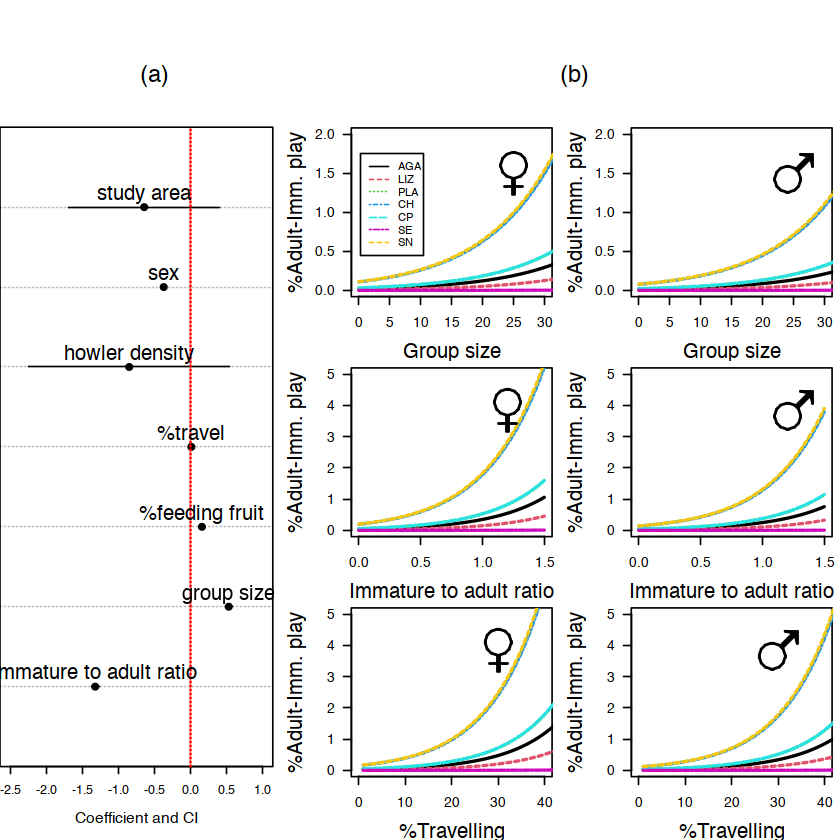

In [18]:
###Adult immature social play
#####ADIM PLOTS##############
############################3

mat <- matrix(c(1,1,1,2,2,2,
                3,3,4,4,5,5,
                3,3,4,4,5,5,
                3,3,6,6,7,7,
                3,3,6,6,7,7,
                3,3,8,8,9,9,
                3,3,8,8,9,9),
              nrow = 7, byrow = TRUE)
mat

layout(mat)
par(mar = c(2, 2, 0, 2))
plot(1:10, 1:10, axes=FALSE, ylab="", xlab="", type="n")
text(4,2,"(a)",cex=1.75)
plot(1:10, 1:10, axes=FALSE, ylab="", xlab="", type="n")
text(4,2,"(b)",cex=1.75)


par(mar = c(5.1, 0, 0.5, 0.5))

####******************************************************

dotchart(my.data$estimate,xlim=c(-2.5,1),pch=21,
         cex=0.6,bg="black",xlab = "Coefficient and CI",
         cex.lab=1.25)
segments(my.data$estimate-my.data$low,
         1:7, my.data$estimate+my.data$up, 1:7)
abline(v=0,col="red",lwd=1.5,lty=3)
text(x = c(my.data$estimate),
     y = c(1,2,3,4,5,6,7),
     labels = my.data$terms,pos = 3,
     cex=1.5)

par(mar = c(4, 4.5, 0.5, 0.5))


#group size on females
plot((z.gr*sd.gr)+mean.gr,data.ptime$X.playim*100, pch = 16,
     col="white",xlab = "Group size",ylab="%Adult-Imm. play", 
     ylim=c(0,2),xlim=c(0,30),cex.lab=1.5,las=1)
lines((newdata.gr.f.aga$z.gr*sd.gr)+mean.gr, predicted.gr.f.aga*100,
      lwd=2,col=1,lty=1,type="l",pch=1)
lines((newdata.gr.f.liz$z.gr*sd.gr)+mean.gr, predicted.gr.f.liz*100,
      lwd=2,col=2,lty=2,type="l",pch=2)
lines((newdata.gr.f.pla$z.gr*sd.gr)+mean.gr, predicted.gr.f.pla*100,
      lwd=2,col=3,lty=3,type="l",pch=3)
lines((newdata.gr.f.ch$z.gr*sd.gr)+mean.gr, predicted.gr.f.ch*100,
      lwd=2,col=4,lty=4,type="l",pch=4)
lines((newdata.gr.f.cp$z.gr*sd.gr)+mean.gr, predicted.gr.f.cp*100,
      lwd=2,col=5,lty=5,type="l",pch=5)
lines((newdata.gr.f.se$z.gr*sd.gr)+mean.gr, predicted.gr.f.se*100,
      lwd=2,col=6,lty=6,type="l",pch=6)
lines((newdata.gr.f.sn$z.gr*sd.gr)+mean.gr, predicted.gr.f.sn*100,
      lwd=2,col=7,lty=2,type="o",pch=18,cex=0.5)

text(25,1.5,labels='\\VE',
     vfont=c("sans serif","bold"),cex=5)
legend(0.25,1.75, legend=c("AGA","LIZ","PLA","CH","CP","SE","SN"),
       col=c(1,2,3,4,5,6,7), lty=c(1,2,3,4,5,6,2), cex=0.8,
       box.lty=1,lwd=1)

#group size males
plot((z.gr*sd.gr)+mean.gr,data.ptime$X.playim*100, pch = 16,
     col="white",xlab = "Group size",ylab="%Adult-Imm. play", 
     ylim=c(0,2),xlim=c(0,30),cex.lab=1.5,las=1)
lines((newdata.gr.m.aga$z.gr*sd.gr)+mean.gr, predicted.gr.m.aga*100,
      lwd=2,col=1,lty=1,type="l",pch=1)
lines((newdata.gr.m.liz$z.gr*sd.gr)+mean.gr, predicted.gr.m.liz*100,
      lwd=2,col=2,lty=2,type="l",pch=2)
lines((newdata.gr.m.pla$z.gr*sd.gr)+mean.gr, predicted.gr.m.pla*100,
      lwd=2,col=3,lty=3,type="l",pch=3)
lines((newdata.gr.m.ch$z.gr*sd.gr)+mean.gr, predicted.gr.m.ch*100,
      lwd=2,col=4,lty=4,type="l",pch=4)
lines((newdata.gr.m.cp$z.gr*sd.gr)+mean.gr, predicted.gr.m.cp*100,
      lwd=2,col=5,lty=5,type="l",pch=5)
lines((newdata.gr.m.se$z.gr*sd.gr)+mean.gr, predicted.gr.m.se*100,
      lwd=2,col=6,lty=6,type="l",pch=6)
lines((newdata.gr.m.sn$z.gr*sd.gr)+mean.gr, predicted.gr.m.sn*100,
      lwd=2,col=7,lty=2,type="o",pch=18,cex=0.5)
text(25,1.5,labels='\\MA',
     vfont=c("sans serif","bold"),cex=5)

plot((z.ir*sd.ir)+mean.ir,data.ptime$X.playim*100, pch = 16,
     col="white",xlab = "Immature to adult ratio",ylab="%Adult-Imm. play", 
     ylim=c(0,5),xlim=c(0,1.5),cex.lab=1.5,las=1)
lines((newdata.ir.f.aga$z.ir*sd.ir)+mean.ir, predicted.ir.f.aga*100,
      lwd=2,col=1,lty=1,type="l",pch=1)
lines((newdata.ir.f.liz$z.ir*sd.ir)+mean.ir, predicted.ir.f.liz*100,
      lwd=2,col=2,lty=2,type="l",pch=2)
lines((newdata.ir.f.pla$z.ir*sd.ir)+mean.ir, predicted.ir.f.pla*100,
      lwd=2,col=3,lty=3,type="l",pch=3)
lines((newdata.ir.f.ch$z.ir*sd.ir)+mean.ir, predicted.ir.f.ch*100,
      lwd=2,col=4,lty=4,type="l",pch=4)
lines((newdata.ir.f.cp$z.ir*sd.ir)+mean.ir, predicted.ir.f.cp*100,
      lwd=2,col=5,lty=5,type="l",pch=5)
lines((newdata.ir.f.se$z.ir*sd.ir)+mean.ir, predicted.ir.f.se*100,
      lwd=2,col=6,lty=6,type="l",pch=6)
lines((newdata.ir.f.sn$z.ir*sd.ir)+mean.ir, predicted.ir.f.sn*100,
      lwd=2,col=7,lty=2,type="o",pch=18,cex=0.5)

text(1.2,3.85,labels='\\VE',
     vfont=c("sans serif","bold"),cex=5)


######
plot((z.ir*sd.ir)+mean.ir,data.ptime$X.playim*100, pch = 16,
     col="white",xlab = "Immature to adult ratio",ylab="%Adult-Imm. play", 
     ylim=c(0,5),xlim=c(0,1.5),cex.lab=1.5,las=1)
lines((newdata.ir.m.aga$z.ir*sd.ir)+mean.ir, predicted.ir.m.aga*100,
      lwd=2,col=1,lty=1,type="l",pch=1)
lines((newdata.ir.m.liz$z.ir*sd.ir)+mean.ir, predicted.ir.m.liz*100,
      lwd=2,col=2,lty=2,type="l",pch=2)
lines((newdata.ir.m.pla$z.ir*sd.ir)+mean.ir, predicted.ir.m.pla*100,
      lwd=2,col=3,lty=3,type="l",pch=3)
lines((newdata.ir.m.ch$z.ir*sd.ir)+mean.ir, predicted.ir.m.ch*100,
      lwd=2,col=4,lty=4,type="l",pch=4)
lines((newdata.ir.m.cp$z.ir*sd.ir)+mean.ir, predicted.ir.m.cp*100,
      lwd=2,col=5,lty=5,type="l",pch=5)
lines((newdata.ir.m.se$z.ir*sd.ir)+mean.ir, predicted.ir.m.se*100,
      lwd=2,col=6,lty=6,type="l",pch=6)
lines((newdata.ir.m.sn$z.ir*sd.ir)+mean.ir, predicted.ir.m.sn*100,
      lwd=2,col=7,lty=2,type="o",pch=18,cex=0.5)
text(1.25,3.85,labels='\\MA',
     vfont=c("sans serif","bold"),cex=5)

######PLOTS

plot(((z.tr*sd.tr)+mean.tr)*100,data.ptime$X.playim*100, pch = 16,
     col="white",xlab = "%Travelling",las=1, 
     ylab = "%Adult-Imm. play",ylim=c(0,5),xlim=c(0,40),cex.lab=1.5)
lines(((newdata.tr.f.aga$z.tr*sd.tr)+mean.tr)*100, predicted.tr.f.aga*100,
      lwd=2,col=1,lty=1,type="l",pch=1)
lines(((newdata.tr.f.aga$z.tr*sd.tr)+mean.tr)*100, predicted.tr.f.liz*100,
      lwd=2,col=2,lty=2,type="l",pch=2)
lines(((newdata.tr.f.aga$z.tr*sd.tr)+mean.tr)*100, predicted.tr.f.pla*100,
      lwd=2,col=3,lty=3,type="l",pch=3)
lines(((newdata.tr.f.aga$z.tr*sd.tr)+mean.tr)*100, predicted.tr.f.ch*100,
      lwd=2,col=4,lty=4,type="l",pch=4)
lines(((newdata.tr.f.aga$z.tr*sd.tr)+mean.tr)*100, predicted.tr.f.cp*100,
      lwd=2,col=5,lty=5,type="l",pch=5)
lines(((newdata.tr.f.aga$z.tr*sd.tr)+mean.tr)*100, predicted.tr.f.se*100,
      lwd=2,col=6,lty=6,type="l",pch=6)
lines(((newdata.tr.f.aga$z.tr*sd.tr)+mean.tr)*100, predicted.tr.f.sn*100,
      lwd=2,col=7,lty=2,type="o",pch=18,cex=0.5)
text(30,3.85,labels='\\VE',
     vfont=c("sans serif","bold"),cex=5)

######PLOTS
plot(((z.tr*sd.tr)+mean.tr)*100,data.ptime$X.playim*100, pch = 16,
     col="white",xlab = "%Travelling",las=1, 
     ylab = "%Adult-Imm. play",ylim=c(0,5),xlim=c(0,40),cex.lab=1.5)
lines(((newdata.tr.m.aga$z.tr*sd.tr)+mean.tr)*100, predicted.tr.m.aga*100,
      lwd=2,col=1,lty=1,type="l",pch=1)
lines(((newdata.tr.m.aga$z.tr*sd.tr)+mean.tr)*100, predicted.tr.m.liz*100,
      lwd=2,col=2,lty=2,type="l",pch=2)
lines(((newdata.tr.m.aga$z.tr*sd.tr)+mean.tr)*100, predicted.tr.m.pla*100,
      lwd=2,col=3,lty=3,type="l",pch=3)
lines(((newdata.tr.m.aga$z.tr*sd.tr)+mean.tr)*100, predicted.tr.m.ch*100,
      lwd=2,col=4,lty=4,type="l",pch=4)
lines(((newdata.tr.m.aga$z.tr*sd.tr)+mean.tr)*100, predicted.tr.m.cp*100,
      lwd=2,col=5,lty=5,type="l",pch=5)
lines(((newdata.tr.m.aga$z.tr*sd.tr)+mean.tr)*100, predicted.tr.m.se*100,
      lwd=2,col=6,lty=6,type="l",pch=6)
lines(((newdata.tr.m.aga$z.tr*sd.tr)+mean.tr)*100, predicted.tr.m.sn*100,
      lwd=2,col=7,lty=2,type="o",pch=18,cex=0.5)
text(30,3.85,labels='\\MA',
     vfont=c("sans serif","bold"),cex=5)


	One Sample t-test

data:  pref.data$ADULT.PREF
t = -0.73111, df = 56, p-value = 0.4678
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.4605658  0.2142746
sample estimates:
 mean of x 
-0.1231456 



	Welch Two Sample t-test

data:  ADULT.PREF by SEX
t = -0.78044, df = 46.333, p-value = 0.4391
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.9469085  0.4177155
sample estimates:
mean in group f mean in group m 
    -0.22062853      0.04396798 


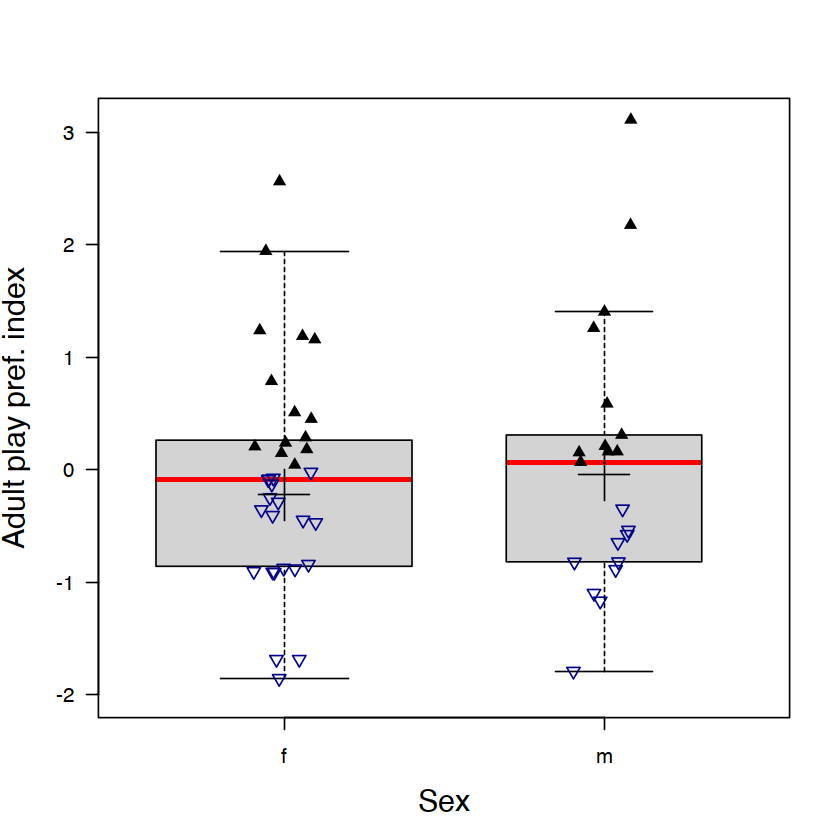

In [20]:
################
################preferences
#################


setwd("~/Documents/R scripts and data/PLAY")
pref.data<-read.csv("playprefCORR.csv",header=TRUE)

boxplot(ADULT.PREF ~ SEX, data = pref.data,
        xlab = "Sex", ylab = "Adult play pref. index",
        varwidth = TRUE,
        col = "lightgray",outline=F,las=1,
        cex.lab=1.5,medcol="red",ylim=c(-2,3.1))
#abline(h=0,lty=4,lwd=3,col="black")
positive<-subset(pref.data, ADULT.PREF>0)
negative<-subset(pref.data, ADULT.PREF<0)
stripchart(ADULT.PREF ~ SEX, data = positive,
           vertical = TRUE, 
           method = "jitter", 
           add = TRUE, pch = 17, col = 'black',
           cex=1.1)
stripchart(ADULT.PREF ~ SEX, data = negative,
           vertical = TRUE, 
           method = "jitter", 
           add = TRUE, pch = 6, col = 'dark blue',
           cex=1.1)
means <- tapply(pref.data$ADULT.PREF,pref.data$SEX,mean)
points(c(-0.22,-0.043),pch=3,
       cex=4)

t.test(pref.data$ADULT.PREF)
t.test(ADULT.PREF~SEX,data=pref.data)